In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read the input file 'diabetes.csv' using Pandas and check it's column names(1 Marks)

In [2]:
diabt = pd.read_csv("diabetes.csv")
diabt.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Eye ball the imported dataset

In [4]:
diabt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Check dimension of dataset

In [5]:
diabt.shape

(768, 9)

### Check distribution of dependent variable, Outcome and plot it (1 Marks)

In [10]:
class_count = diabt['Outcome'].value_counts()
class_count

0    500
1    268
Name: Outcome, dtype: int64

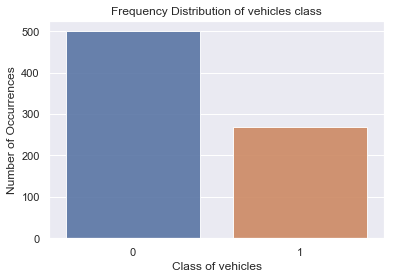

In [11]:
sns.set(style="darkgrid")
sns.barplot(class_count.index, class_count.values, alpha=0.9)
plt.title('Frequency Distribution of vehicles class')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class of vehicles', fontsize=12)
plt.show()

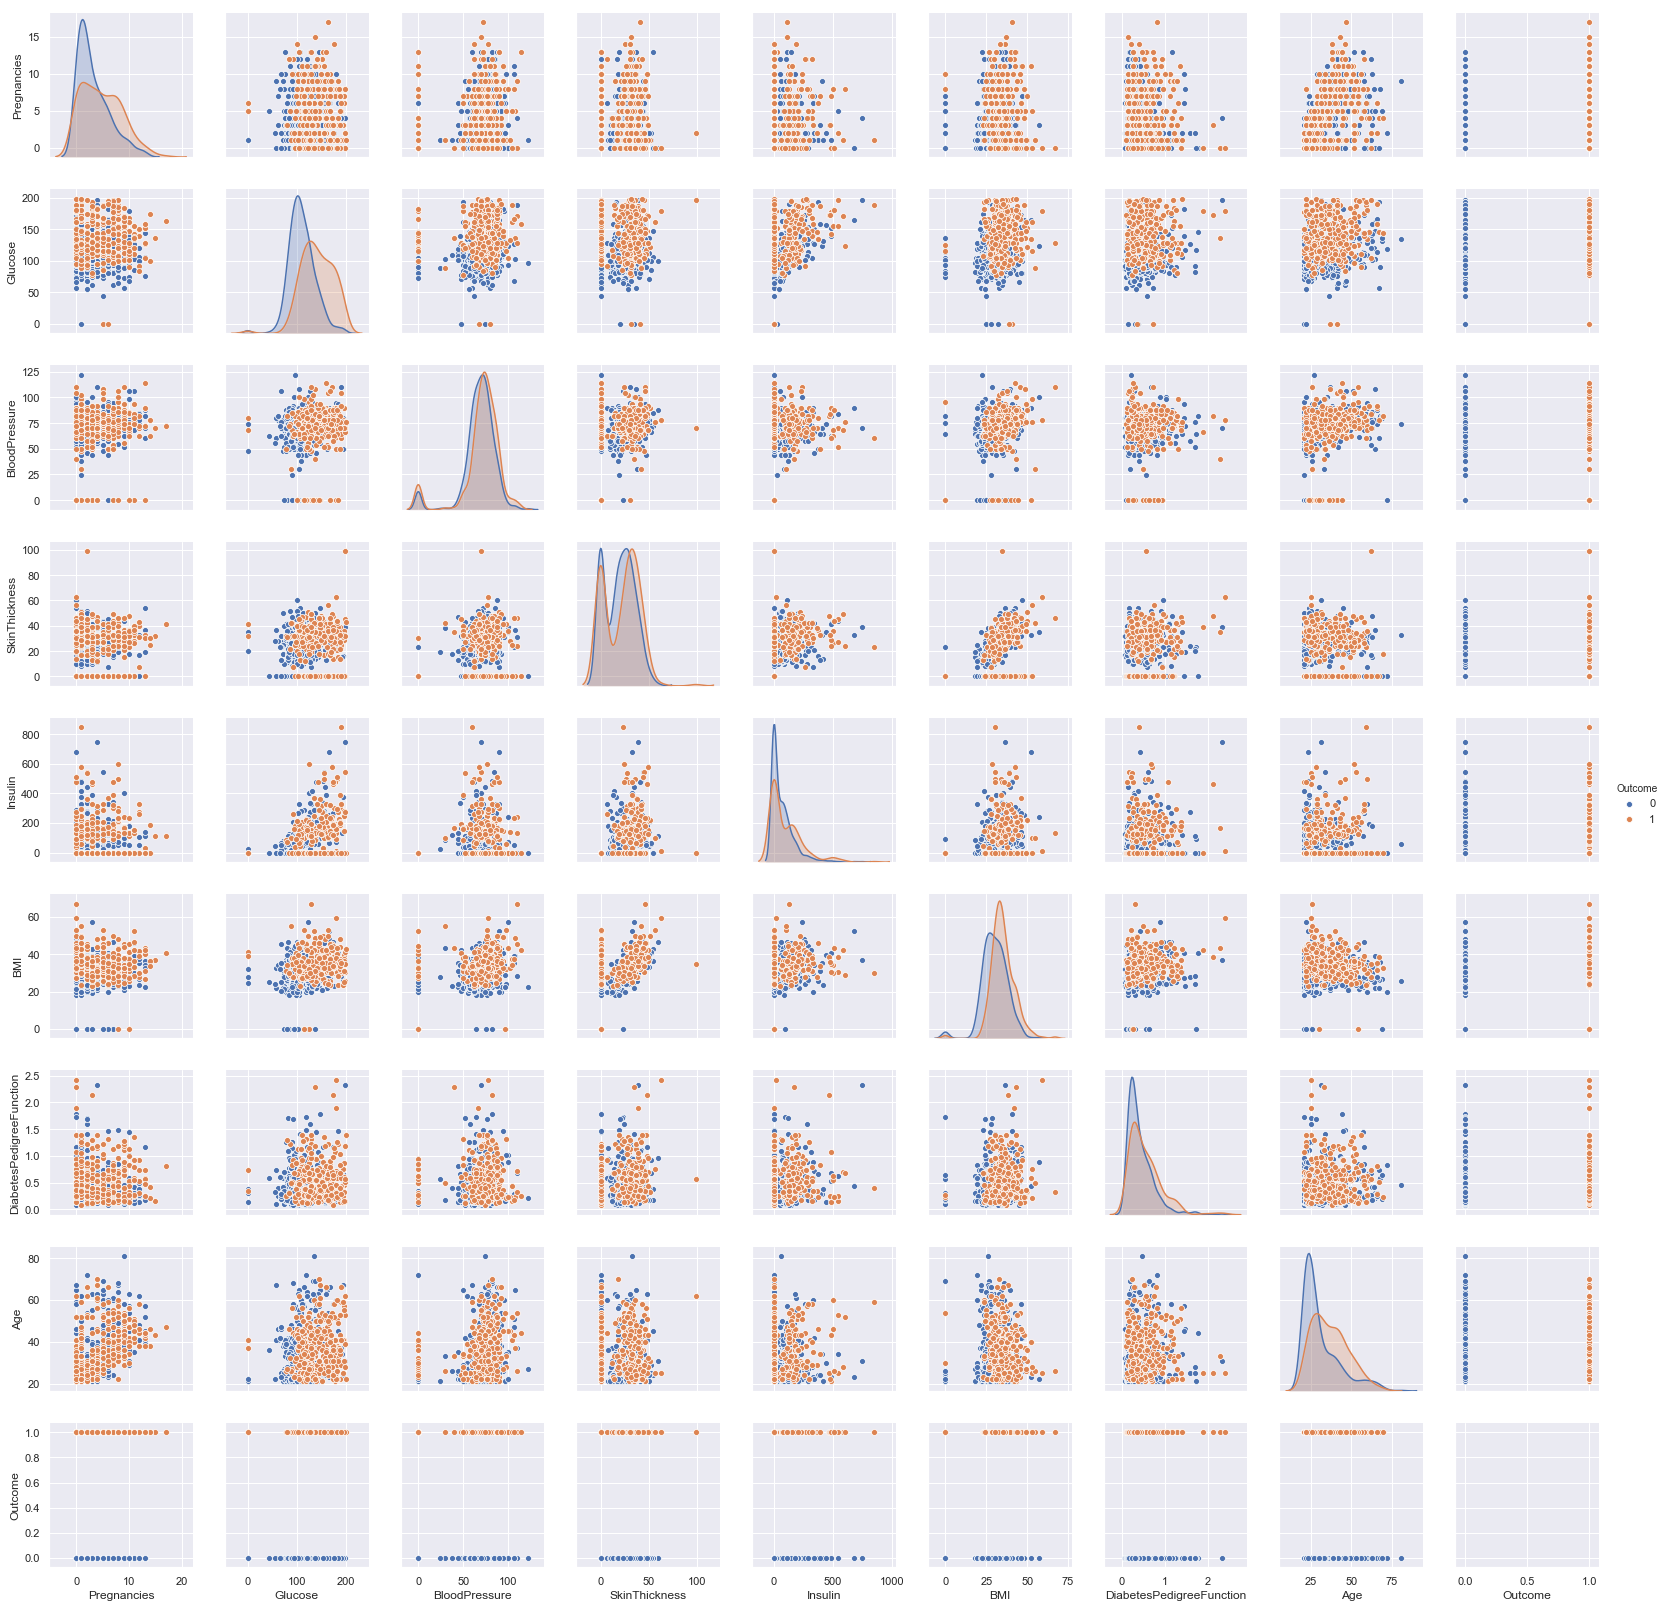

In [9]:
import seaborn as sns
sns.pairplot(diabt, hue='Outcome' , diag_kind= 'kde')

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [ ]:
# Check data types and info of dataset

### Check data distribution using summary statistics and provide your findings(2 Marks)

In [12]:
diabt.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Do correlation analysis and bivariate viualization with Insights(1 Marks)

In [13]:
corr = diabt.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


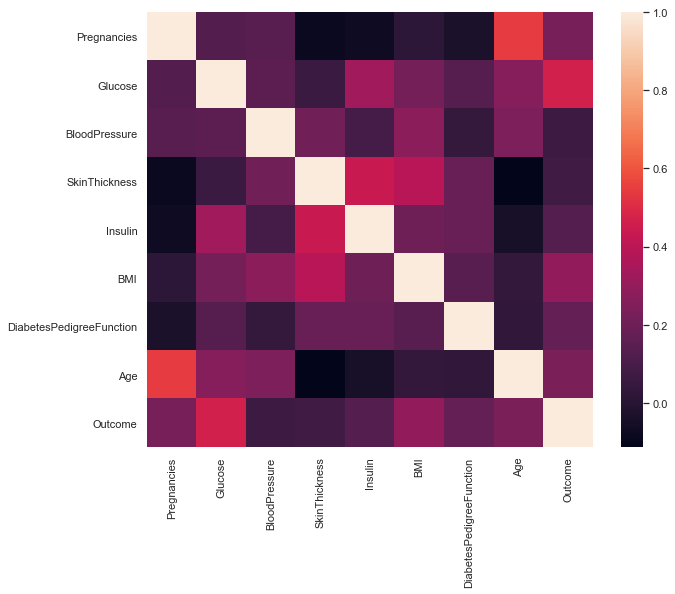

In [14]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [15]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
X = diabt.drop('Outcome', axis=1)  
y = diabt['Outcome'] 

In [ ]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=1)
sss.get_n_splits(X, y)
sss

In [ ]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X,y,train_size=.3, stratify=y)

### Train Support Vector Machine Model(1 Marks)

In [21]:
# use from sklearn.svm import SVC
from sklearn.svm import SVC  


In [22]:
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)  

In [23]:
# your insights

### Scale the data points using MinMaxScaler ( 1 Marks)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(diabt))


MinMaxScaler(copy=True, feature_range=(0, 1))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [25]:
print(scaler.data_max_)

[ 17.   199.   122.    99.   846.    67.1    2.42  81.     1.  ]


In [26]:
print(scaler.transform(diabt))

[[0.35294118 0.74371859 0.59016393 ... 0.23441503 0.48333333 1.        ]
 [0.05882353 0.42713568 0.54098361 ... 0.11656704 0.16666667 0.        ]
 [0.47058824 0.91959799 0.52459016 ... 0.25362938 0.18333333 1.        ]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.07130658 0.15       0.        ]
 [0.05882353 0.63316583 0.49180328 ... 0.11571307 0.43333333 1.        ]
 [0.05882353 0.46733668 0.57377049 ... 0.10119556 0.03333333 0.        ]]


### Fit SVM Model on Scale data and give your observation( 1 Marks)

In [27]:
svclassifier = SVC(C= .1, kernel='linear', gamma= 1)  
svclassifier.fit(X_train, y_train)  

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
prediction = svclassifier .predict(X_test)

In [29]:
print(svclassifier.score(X_train, y_train))
print(svclassifier.score(X_test, y_test))

0.7802607076350093
0.7619047619047619


#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [30]:
svclassifier = SVC(C= 1000, kernel='linear', gamma= 1)  
svclassifier.fit(X_train, y_train)  

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
prediction = svclassifier .predict(X_test)

In [32]:
print(svclassifier.score(X_train, y_train))
print(svclassifier.score(X_test, y_test))

0.7690875232774674
0.7748917748917749


In [33]:
#svclassifier = SVC(C= 1, kernel='rbf', gamma= 1)  
#svclassifier.fit(X_train, y_train)  

In [34]:
#prediction = svclassifier .predict(X_test)

In [35]:
#print(svclassifier.score(X_train, y_train))
#print(svclassifier.score(X_test, y_test))

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [36]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [37]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [ ]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [ ]:
gs.fit(X_train, y_train) 

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_score_ 